In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

import matplotlib as mpl
import seaborn as sns

from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='D2Coding')
sns.set(font='D2Coding', rc={'axes.unicode_minus':False}, style='darkgrid')

import statsmodels.api as sm #안쓸지도
import sklearn as sk

#### 패션 mnist
데이터로드

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

In [ ]:
(train_input, train_target), (test_input, test_target) = load_data()

#### 정규화

In [ ]:
train_scaled = train_input / 255.0 # 0 ~ 1사이 실수값 변환
train_scaled = train_scaled.reshape(-1, 28*28) # 784개 1차원 변환


In [ ]:
train_scaled, test_scaled, train_target, test_target = train_test_split(train_scaled, train_target, test_size=0.2, 
random_state=42)

model

In [ ]:
model = keras.Sequential(name='fashion_mnist')
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

model.add(dense1)
model.add(dense2)

In [ ]:
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


dense1 = keras.layers.Dense(10, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='sigmoid')

model = keras.Sequential([])

compile

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5669 - accuracy: 0.8065
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4098 - accuracy: 0.8532
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3750 - accuracy: 0.8645
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3524 - accuracy: 0.8717
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3339 - accuracy: 0.8792


#### ReLU 활성화 함수 / Flatten 층 생성 (2차원 -> 1차원)

In [ ]:
(train_input, train_target), (test_input, test_target) = load_data()

In [ ]:
train_scaled = train_input / 255.0 # 0 ~ 1사이 실수값 변환

In [ ]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2,
random_state=42)

In [ ]:
train_input.shape

(60000, 28, 28)

In [ ]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)
print(test_scaled.shape, test_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
(12000, 784) (10000,)


#### 모델 생성 함수

In [ ]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='ReLU_fashion_mnist')
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))

    if a_layer:
        model.add(a_layer) # 레이어를 계속 추가해서 만들 수 있어!

    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = model_fn(keras.layers.Dense(100, activation='relu'))
model.summary()

Model: "ReLU_fashion_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


손실곡선, 정확도

In [ ]:
model = model_fn()
model.summary()

Model: "ReLU_fashion_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=2)

Epoch 1/20
1500/1500 - 3s - loss: 0.5325 - accuracy: 0.8126 - 3s/epoch - 2ms/step
Epoch 2/20
1500/1500 - 2s - loss: 0.3910 - accuracy: 0.8593 - 2s/epoch - 2ms/step
Epoch 3/20
1500/1500 - 2s - loss: 0.3550 - accuracy: 0.8720 - 2s/epoch - 1ms/step
Epoch 4/20
1500/1500 - 2s - loss: 0.3325 - accuracy: 0.8816 - 2s/epoch - 1ms/step
Epoch 5/20
1500/1500 - 2s - loss: 0.3184 - accuracy: 0.8865 - 2s/epoch - 1ms/step
Epoch 6/20
1500/1500 - 2s - loss: 0.3056 - accuracy: 0.8915 - 2s/epoch - 1ms/step
Epoch 7/20
1500/1500 - 2s - loss: 0.2952 - accuracy: 0.8966 - 2s/epoch - 1ms/step
Epoch 8/20
1500/1500 - 2s - loss: 0.2896 - accuracy: 0.8984 - 2s/epoch - 1ms/step
Epoch 9/20
1500/1500 - 2s - loss: 0.2793 - accuracy: 0.9017 - 2s/epoch - 1ms/step
Epoch 10/20
1500/1500 - 2s - loss: 0.2743 - accuracy: 0.9041 - 2s/epoch - 1ms/step
Epoch 11/20
1500/1500 - 2s - loss: 0.2694 - accuracy: 0.9071 - 2s/epoch - 1ms/step
Epoch 12/20
1500/1500 - 2s - loss: 0.2655 - accuracy: 0.9088 - 2s/epoch - 1ms/step
Epoch 13/20
1

In [ ]:
model = model_fn()
model.summary()

Model: "ReLU_fashion_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


#### 검증손실

훈련세트 훈련 - 이제 정확도 92%

In [53]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data =(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5335 - accuracy: 0.8119 - val_loss: 0.4091 - val_accuracy: 0.8543
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3941 - accuracy: 0.8572 - val_loss: 0.3881 - val_accuracy: 0.8611
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3565 - accuracy: 0.8697 - val_loss: 0.3636 - val_accuracy: 0.8729
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3362 - accuracy: 0.8783 - val_loss: 0.4000 - val_accuracy: 0.8662
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3220 - accuracy: 0.8850 - val_loss: 0.3482 - val_accuracy: 0.8792
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3099 - accuracy: 0.8885 - val_loss: 0.3710 - val_accuracy: 0.8733
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3009 - accuracy: 0.8941 - val_loss: 0.3562 - val_accuracy:

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련세트/검증세트 비교

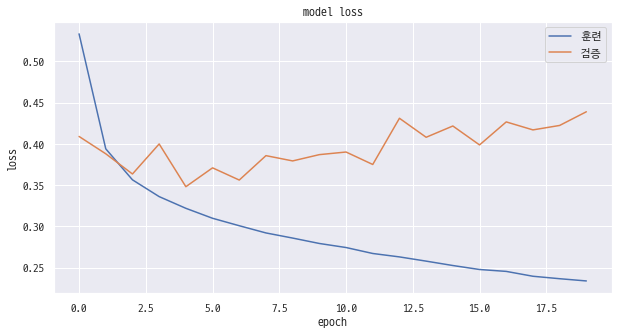

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['훈련', '검증'])
plt.show()

In [57]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()


Model: "ReLU_fashion_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data =(val_scaled, val_target))


Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5872 - accuracy: 0.7951 - val_loss: 0.4413 - val_accuracy: 0.8476
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4488 - accuracy: 0.8417 - val_loss: 0.4235 - val_accuracy: 0.8470
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4229 - accuracy: 0.8509 - val_loss: 0.3879 - val_accuracy: 0.8668
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4096 - accuracy: 0.8585 - val_loss: 0.4266 - val_accuracy: 0.8590
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4013 - accuracy: 0.8619 - val_loss: 0.3955 - val_accuracy: 0.8662
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3959 - accuracy: 0.8645 - val_loss: 0.3867 - val_accuracy: 0.8733
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3904 - accuracy: 0.8677 - val_loss: 0.4033 - val_accuracy:

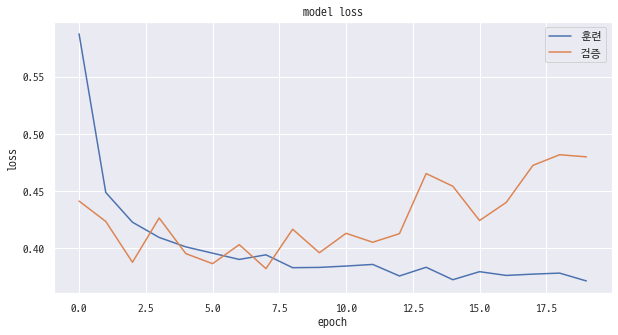

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['훈련', '검증'])
plt.show()

In [60]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, validation_data =(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3719 - accuracy: 0.8722 - val_loss: 0.4073 - val_accuracy: 0.8690
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3458 - accuracy: 0.8751 - val_loss: 0.3914 - val_accuracy: 0.8733
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3392 - accuracy: 0.8792 - val_loss: 0.4020 - val_accuracy: 0.8733
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3297 - accuracy: 0.8798 - val_loss: 0.3680 - val_accuracy: 0.8782
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3187 - accuracy: 0.8814 - val_loss: 0.3909 - val_accuracy: 0.8735
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3159 - accuracy: 0.8841 - val_loss: 0.3735 - val_accuracy: 0.8817
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3056 - accuracy: 0.8862 - val_loss: 0.3931 - val_accuracy:

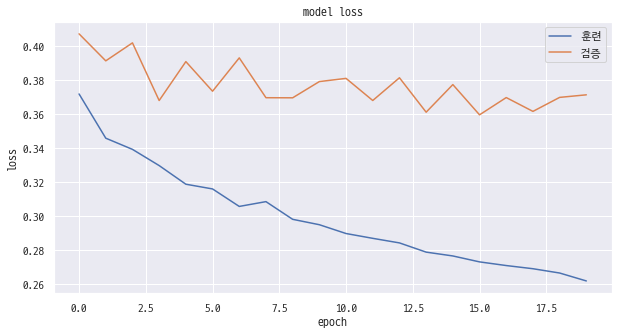

In [61]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['훈련', '검증'])
plt.show()

#### 모델 저장 / 로드

In [64]:
# 훈련 가중치만
model.save_weights('./data/model_weights.h5')

In [65]:
# 훈련 전체
model.save('./data/model_whole.h5')

In [66]:
# 가중치 모델 로드

In [67]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model_weights.h5')

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, validation_data =(val_scaled, val_target))


Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2641 - accuracy: 0.8992 - val_loss: 0.3910 - val_accuracy: 0.8809
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2570 - accuracy: 0.9031 - val_loss: 0.3643 - val_accuracy: 0.8840
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2558 - accuracy: 0.9020 - val_loss: 0.3669 - val_accuracy: 0.8827
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2508 - accuracy: 0.9037 - val_loss: 0.3727 - val_accuracy: 0.8820
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2517 - accuracy: 0.9042 - val_loss: 0.3678 - val_accuracy: 0.8841
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2489 - accuracy: 0.9046 - val_loss: 0.3730 - val_accuracy: 0.8791
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2506 - accuracy: 0.9050 - val_loss: 0.3794 - val_accuracy:

In [68]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3914 - accuracy: 0.8839


[0.3913652002811432, 0.8839166760444641]

In [69]:
##### 전체모델 가져오기

In [71]:
model = keras.models.load_model('./data/model_whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3714 - accuracy: 0.8817


[0.37136054039001465, 0.8816666603088379]

가중치만 저장하면 모델 기능 제약있음.
모델 전체 데이터를 저장하면 모든 기능 사용가능

In [72]:
model.predict(val_scaled[:5])

1/1 [==============================] - 0s 126ms/step


array([[1.8418311e-29, 0.0000000e+00, 1.5043131e-38, 7.1231074e-31,
        2.9128663e-30, 7.6638126e-13, 1.3883081e-32, 3.5825378e-19,
        1.0000000e+00, 4.0474869e-26],
       [3.0708412e-16, 0.0000000e+00, 1.6743412e-21, 2.4606960e-37,
        5.1164186e-21, 4.5043748e-18, 1.7686780e-15, 1.0087478e-21,
        1.0000000e+00, 1.6272122e-18],
       [6.2548100e-30, 2.1491587e-28, 6.0601311e-36, 1.0884616e-24,
        0.0000000e+00, 3.4841571e-07, 2.0044309e-33, 9.9999964e-01,
        2.6405463e-21, 6.1927256e-15],
       [2.4138922e-03, 1.3894147e-07, 2.2883911e-01, 2.4030471e-04,
        5.9079003e-01, 5.5384018e-12, 1.7765754e-01, 5.5124193e-17,
        5.8871236e-05, 1.2337207e-13],
       [6.0119123e-38, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.9406000e-17, 0.0000000e+00, 9.8481096e-18,
        1.0000000e+00, 2.6272302e-24]], dtype=float32)

In [74]:
### 예측결과

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 1s 2ms/step


0.8816666666666667

NameError: name 'val_lables' is not defined

In [76]:
# 모델 콜백

In [78]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

# 베스트 모델을 저장할 콜백

checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best-model.h5')

model.fit(train_scaled, train_target, epochs=20, 
verbose=1, validation_data =(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5919 - accuracy: 0.7909 - val_loss: 0.4246 - val_accuracy: 0.8449
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4432 - accuracy: 0.8402 - val_loss: 0.3897 - val_accuracy: 0.8572
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4051 - accuracy: 0.8535 - val_loss: 0.3712 - val_accuracy: 0.8644
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3853 - accuracy: 0.8607 - val_loss: 0.3590 - val_accuracy: 0.8683
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3726 - accuracy: 0.8635 - val_loss: 0.3606 - val_accuracy: 0.8652
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3589 - accuracy: 0.8683 - val_loss: 0.3293 - val_accuracy: 0.8789
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3476 - accuracy: 0.8722 - val_loss: 0.3420 - val_accuracy:

In [80]:
# 체크포인트 확인

model = keras.models.load_model('./data/best-model.h5')
model.evaluate(val_scaled, val_target)
# 잘 보면 위의 마지막 값이 저장

375/375 [==============================] - 1s 2ms/step - loss: 0.3290 - accuracy: 0.8867


[0.3289893567562103, 0.8867499828338623]

조기종료

In [87]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

# 베스트 모델을 저장할 콜백

checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, 
verbose=1, validation_data =(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5847 - accuracy: 0.7925 - val_loss: 0.4184 - val_accuracy: 0.8515
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4366 - accuracy: 0.8436 - val_loss: 0.3796 - val_accuracy: 0.8615
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4007 - accuracy: 0.8545 - val_loss: 0.3815 - val_accuracy: 0.8565
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3804 - accuracy: 0.8599 - val_loss: 0.3524 - val_accuracy: 0.8706
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3666 - accuracy: 0.8651 - val_loss: 0.3368 - val_accuracy: 0.8751
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3513 - accuracy: 0.8708 - val_loss: 0.3497 - val_accuracy: 0.8677
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3426 - accuracy: 0.8715 - val_loss: 0.3334 - val_accuracy:

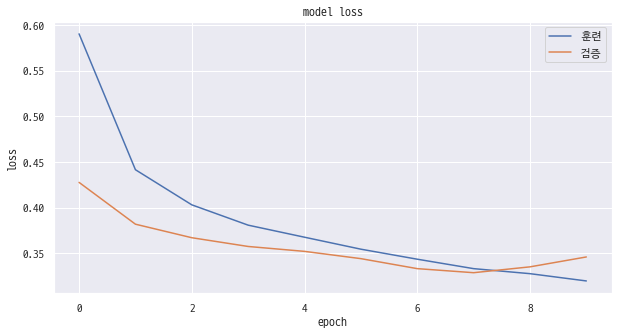

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['훈련', '검증'])
plt.show()

In [84]:
early_stopping_cb.stopped_epoch

9

In [85]:
model.evaluate(val_scaled, val_target) # 나는 9번째

375/375 [==============================] - 1s 2ms/step - loss: 0.3288 - accuracy: 0.8804


[0.32876622676849365, 0.8804166913032532]

In [94]:
model.save_weights('./data/best_model_earlystop_09.h5')

In [86]:
model = keras.models.load_model('./data/best-model.h5') # Early stopping, best model
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8751


[0.34600159525871277, 0.875083327293396]

### 조기종료 된 모델의 저장 값과 체크포인트 저장값을 비교

In [91]:
model_cp = keras.models.load_model('./data/best_model.h5') # chkpoint, best model
model_cp.evaluate(val_scaled, val_target)


375/375 [==============================] - 1s 2ms/step - loss: 0.3277 - accuracy: 0.8792


[0.32768714427948, 0.8792499899864197]

In [96]:
model_09 = keras.models.load_model('./data/best_model_earlystop_09.h5') # Early stopping, 9th model
model_09.evaluate(val_scaled, val_target)

ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x00000150CD5797B0>.